In [1]:
import pandas as pd
import numpy as np
ds = pd.read_csv('dataset.csv')

In [2]:
ds

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist,target
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,Mask Off,Future,1
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,Redbone,Childish Gambino,1
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,Xanny Family,Future,1
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,Master Of None,Beach House,1
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,Parallel Lines,Junior Boys,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4,0.211,Like A Bitch - Kill The Noise Remix,Kill The Noise,0
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4,0.867,Candy,Dillon Francis,0
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4,0.470,Habit - Dack Janiels & Wenzday Remix,Rain Man,0
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4,0.623,First Contact,Twin Moons,0


In [3]:
ds.isnull()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2014,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
ds.isnull().any()

acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
song_title          False
artist              False
target              False
dtype: bool

In [5]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import graphviz
from subprocess import check_call
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['song_title'] = le.fit_transform(ds['song_title'])
ds['artist'] = le.fit_transform(ds['artist'])

In [7]:
X = ds.drop('target', axis=1).copy()
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1043,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1334,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1906,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1044,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1243,628


In [8]:
y = ds['target'].copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

 



In [11]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

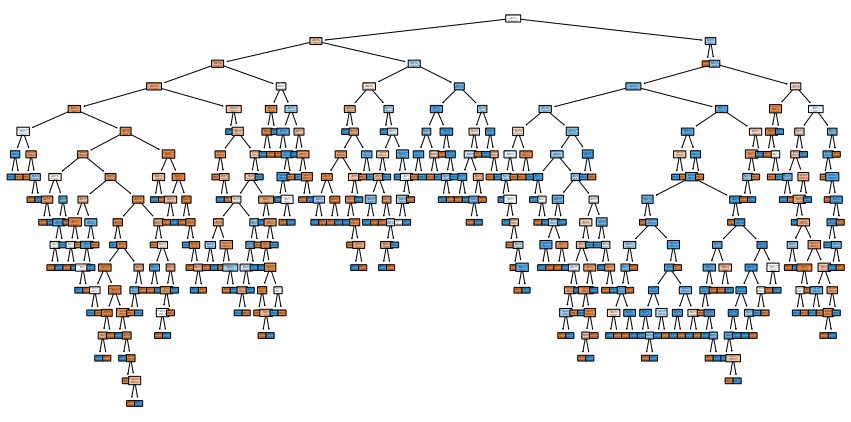

In [12]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf, filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns);

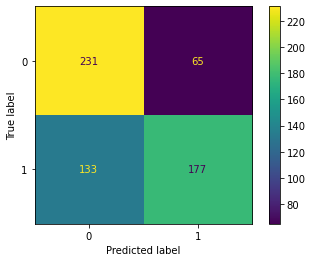

In [13]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['0', '1'])

In [14]:
path = clf.cost_complexity_pruning_path(X_train, y_train)

In [15]:
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

In [16]:
clf_array = []

In [17]:
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clf_array.append(clf)

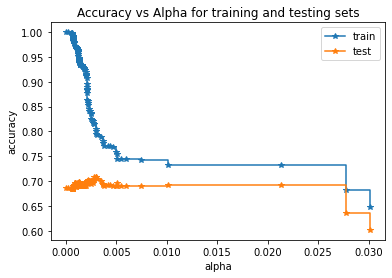

In [18]:
train_scores = [clf.score(X_train, y_train) for clf in clf_array]
test_scores = [clf.score(X_test, y_test) for clf in clf_array]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='*', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='*', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

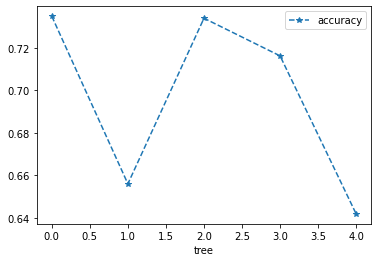

In [19]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.010)
accuracy = cross_val_score(clf, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': accuracy})
df.plot(x = 'tree', y='accuracy', marker='*', linestyle='--')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplo

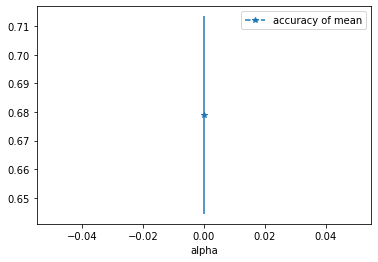

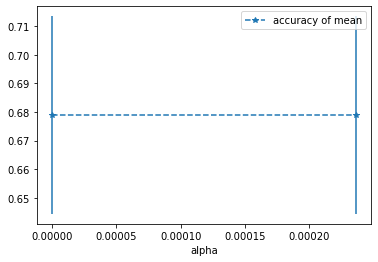

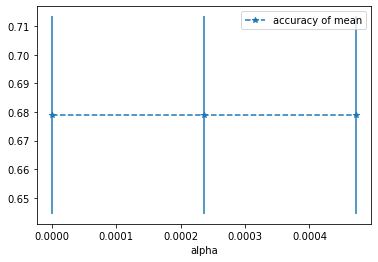

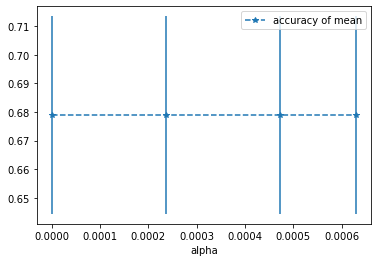

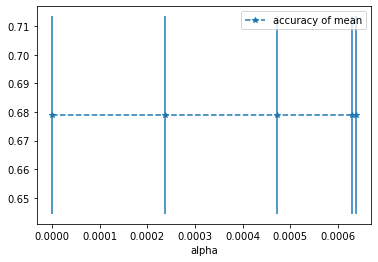

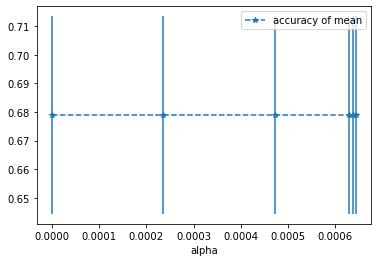

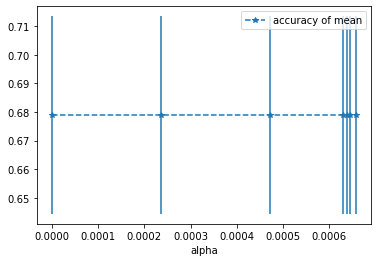

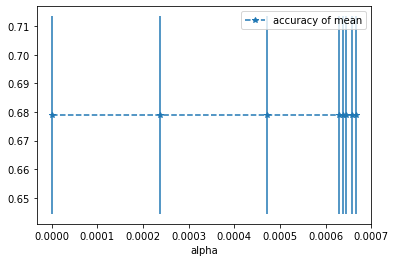

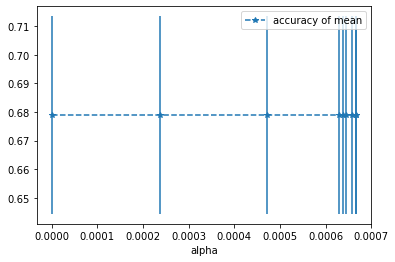

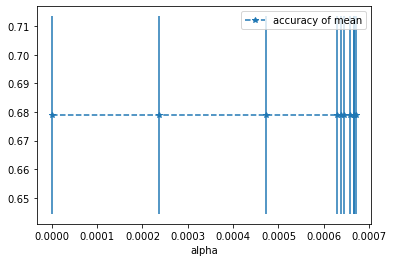

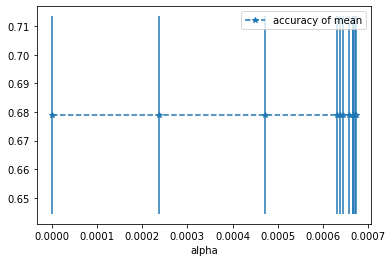

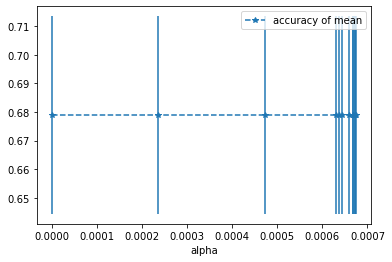

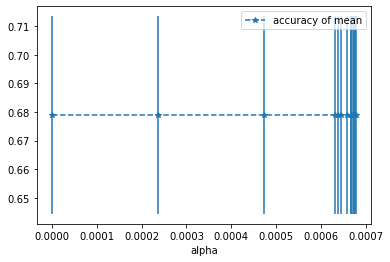

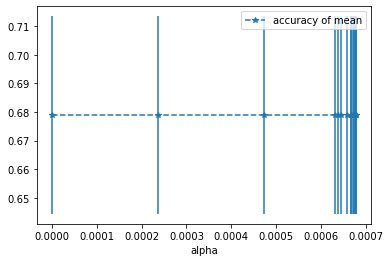

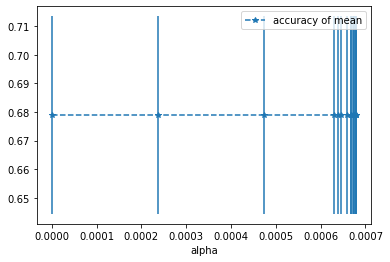

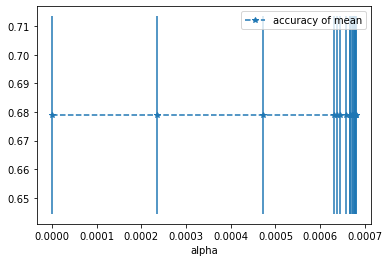

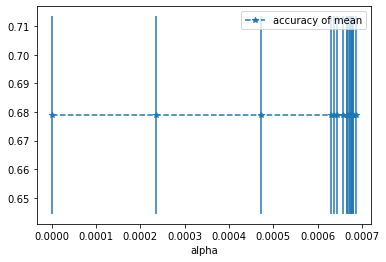

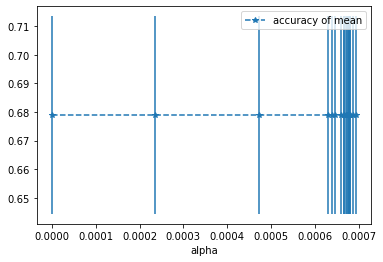

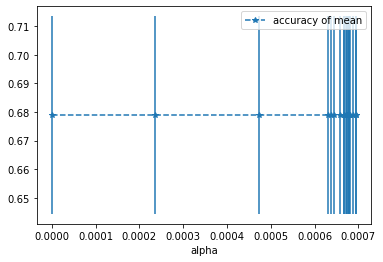

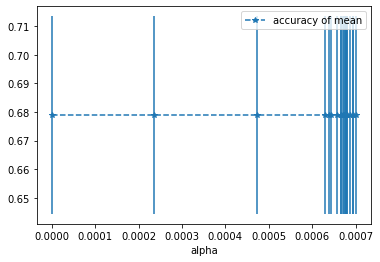

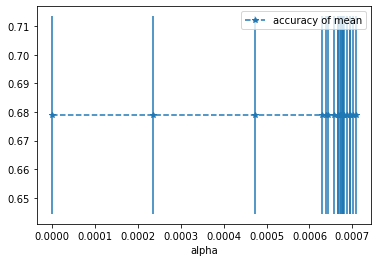

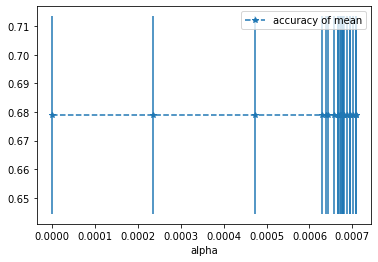

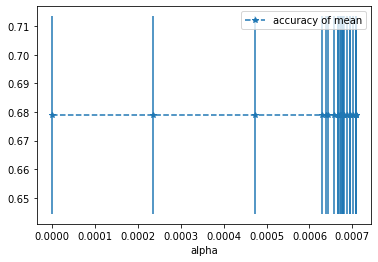

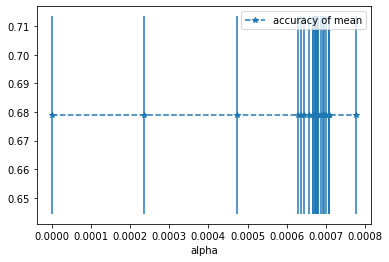

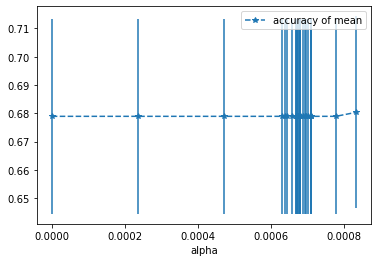

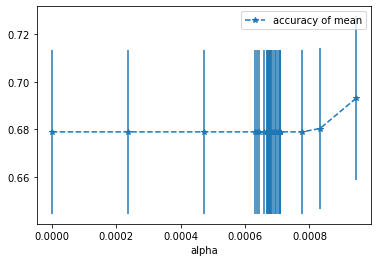

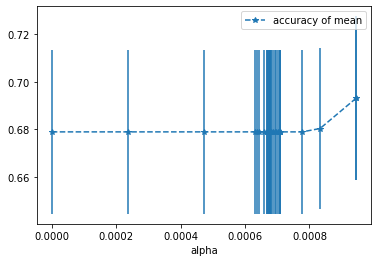

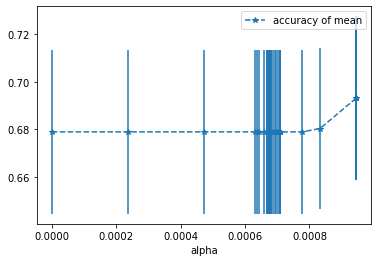

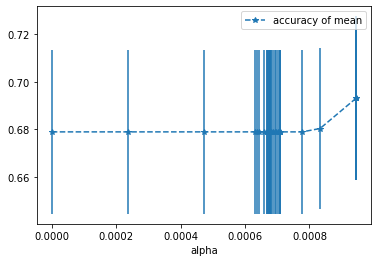

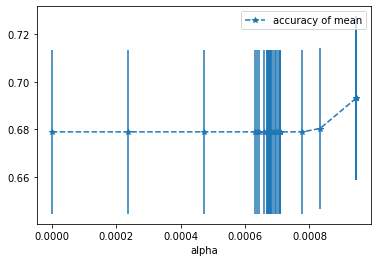

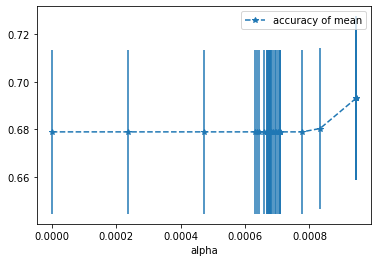

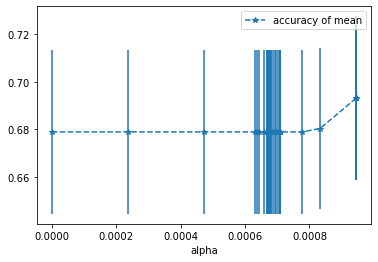

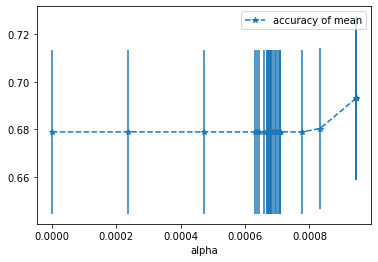

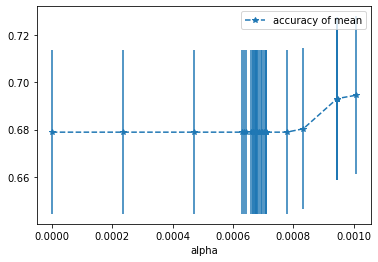

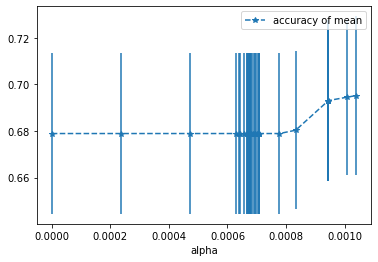

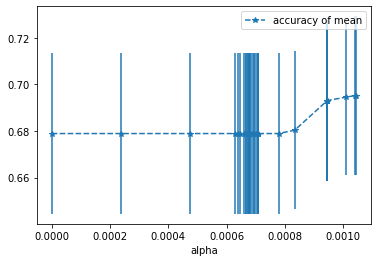

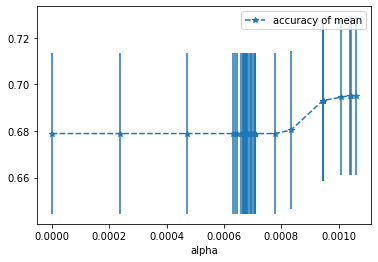

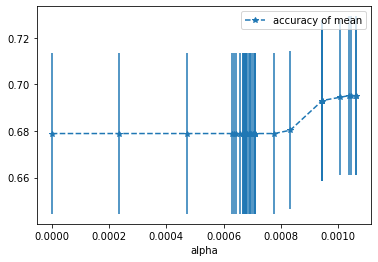

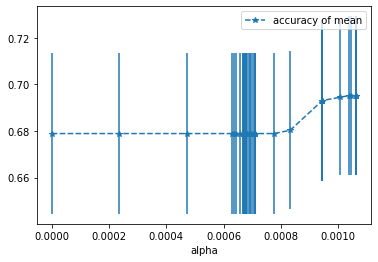

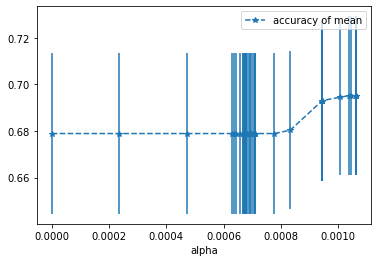

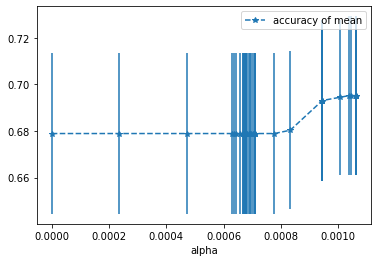

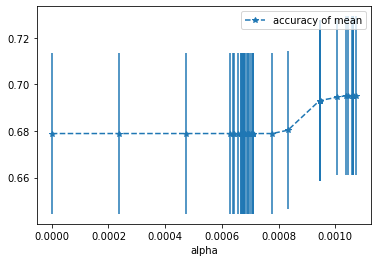

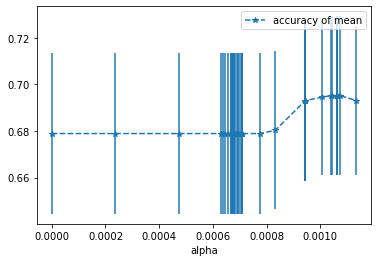

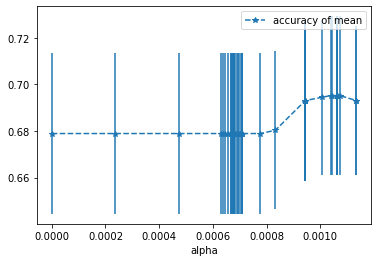

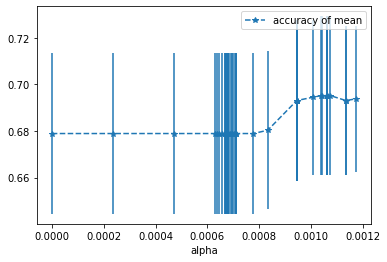

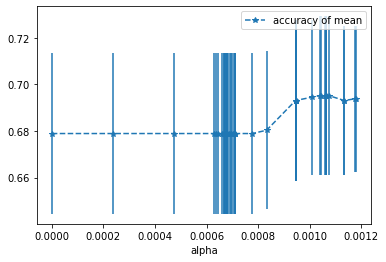

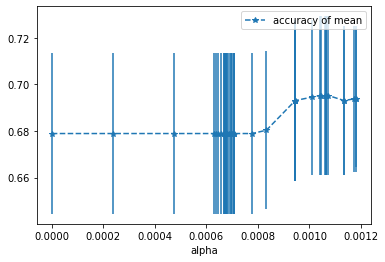

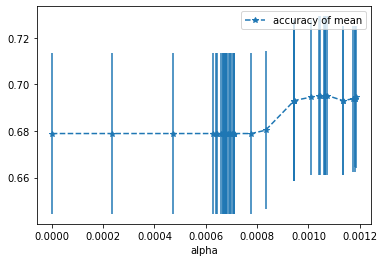

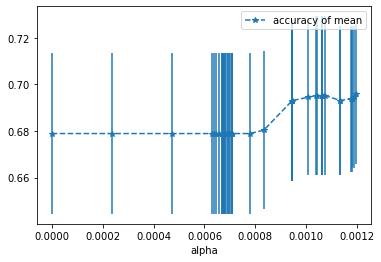

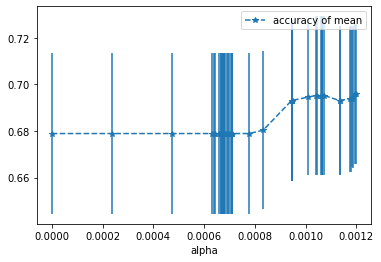

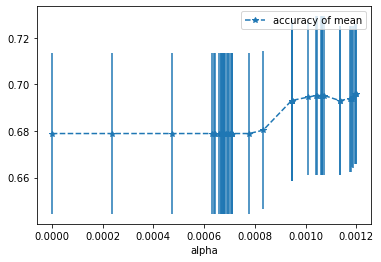

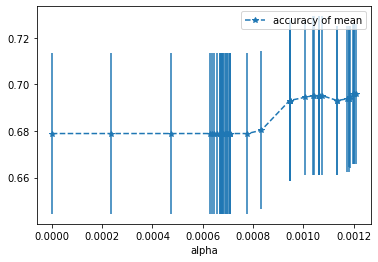

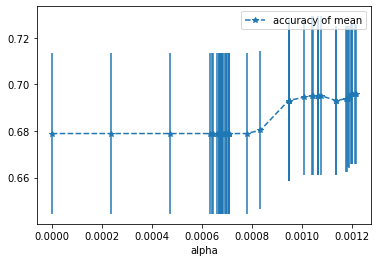

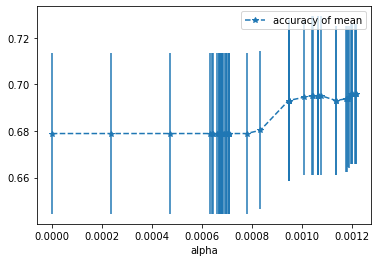

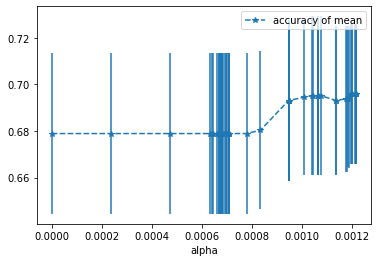

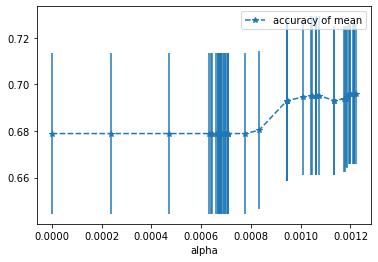

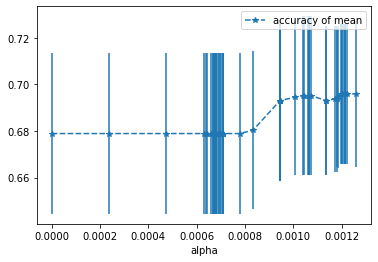

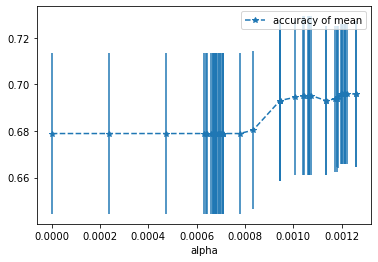

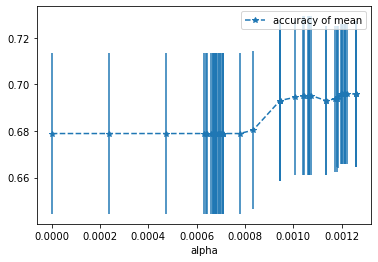

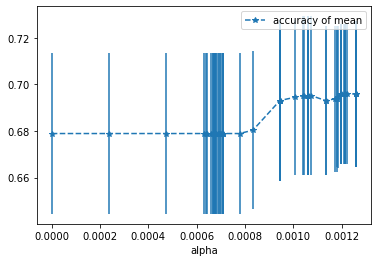

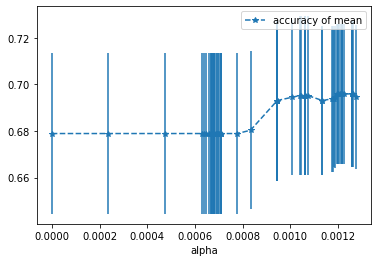

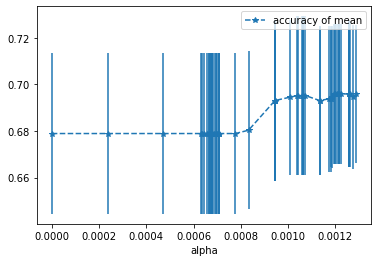

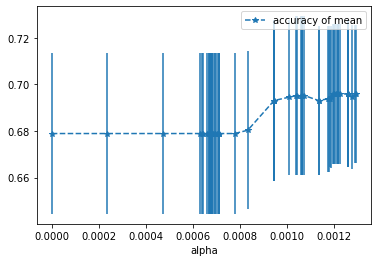

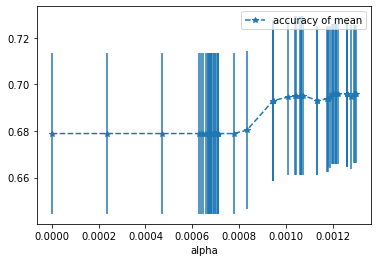

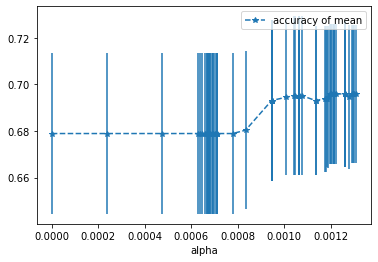

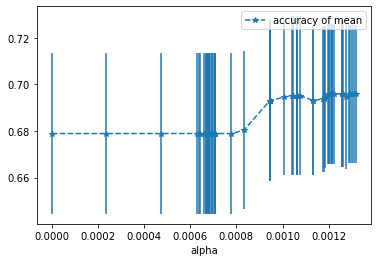

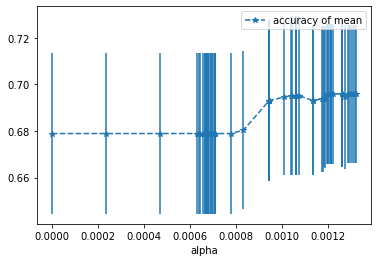

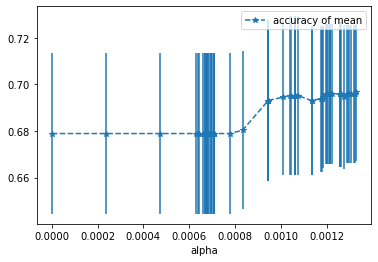

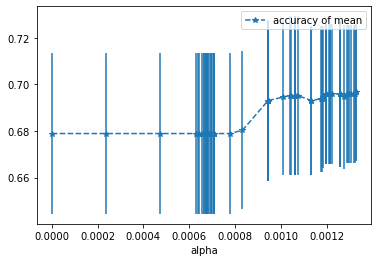

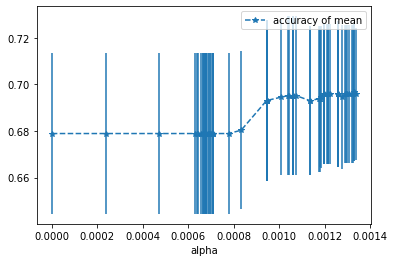

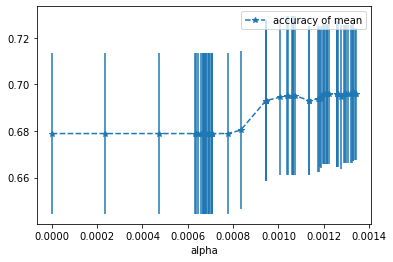

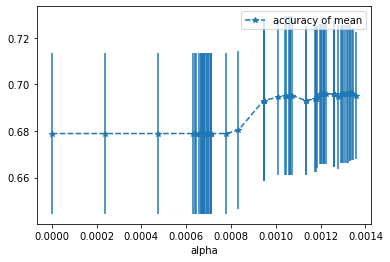

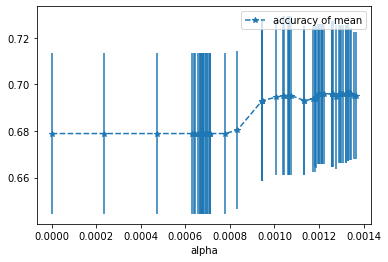

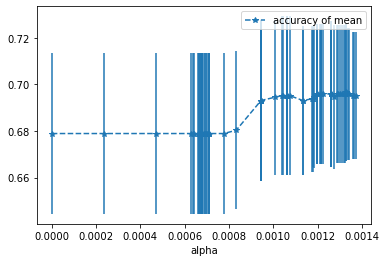

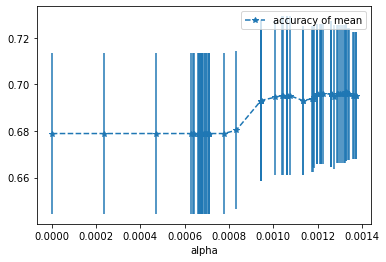

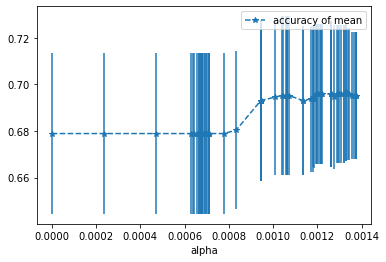

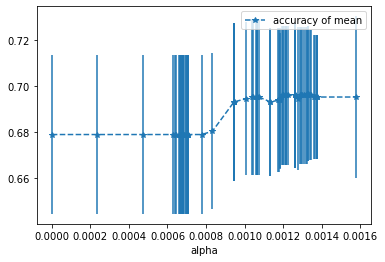

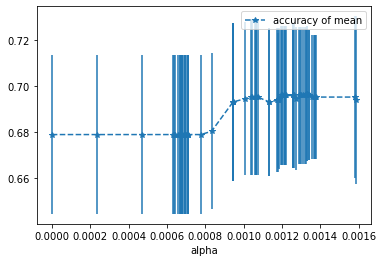

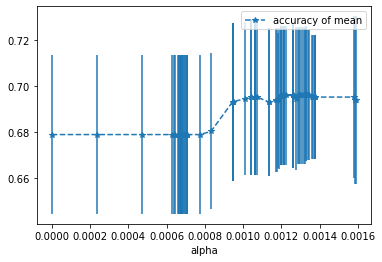

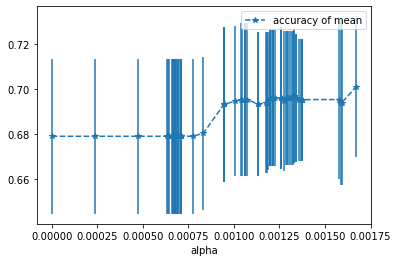

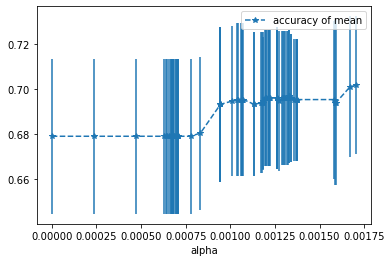

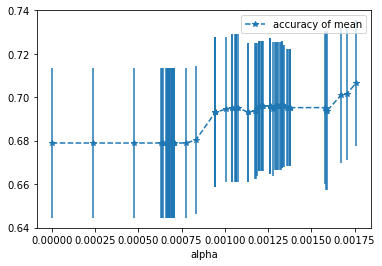

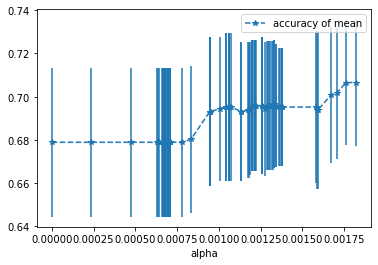

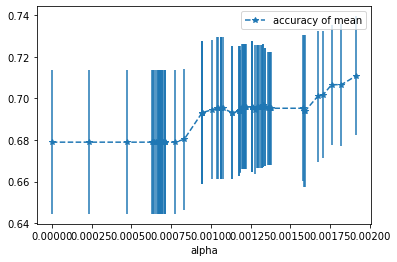

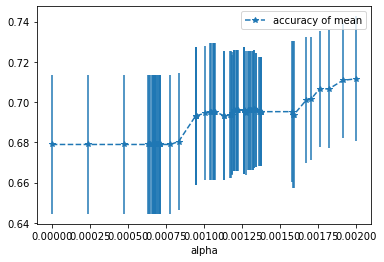

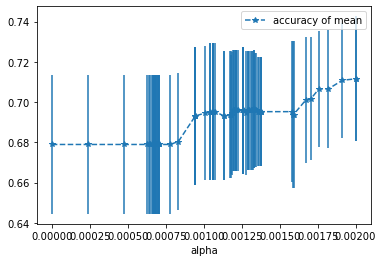

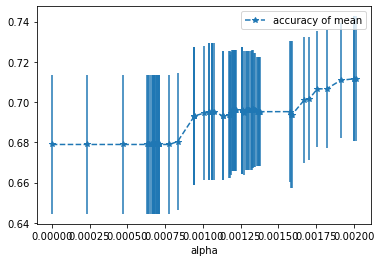

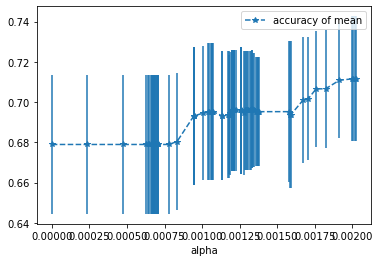

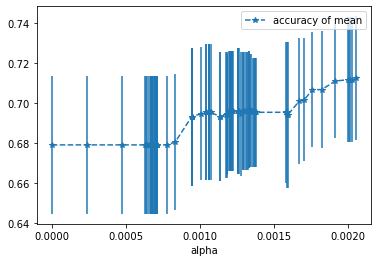

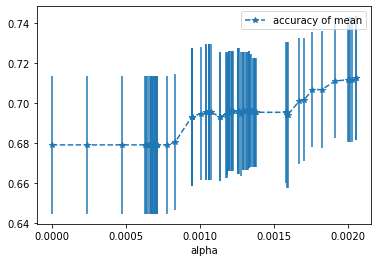

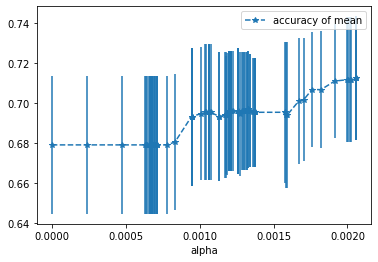

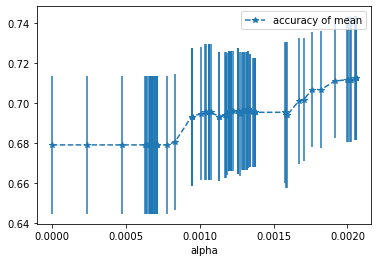

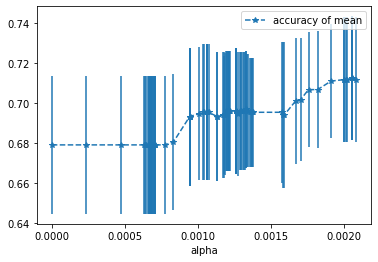

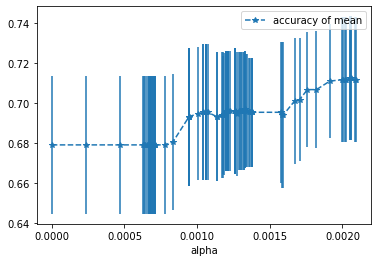

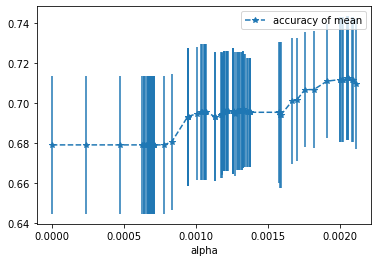

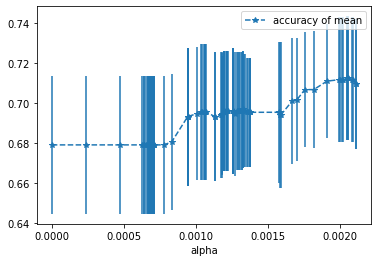

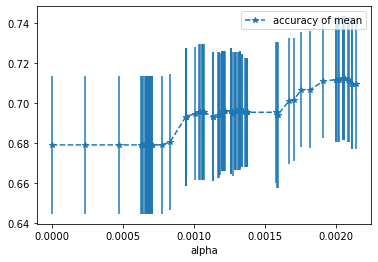

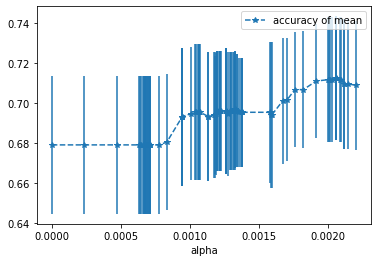

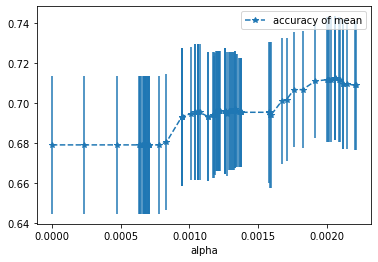

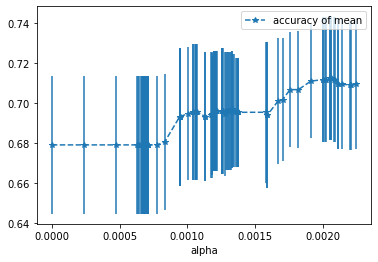

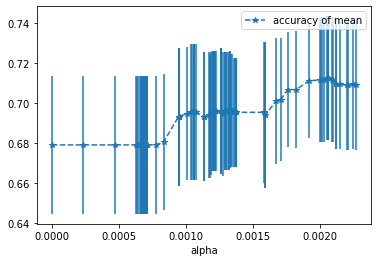

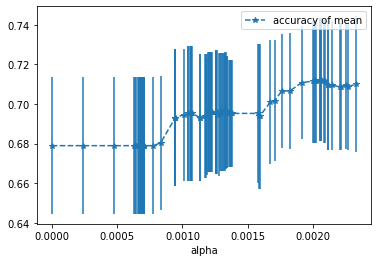

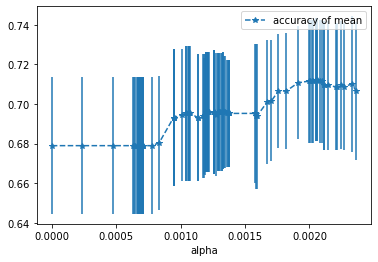

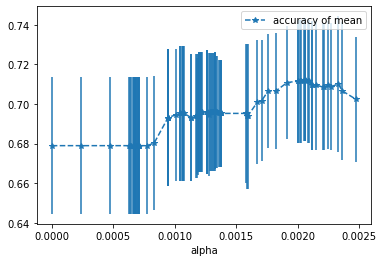

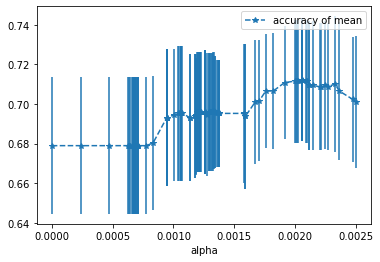

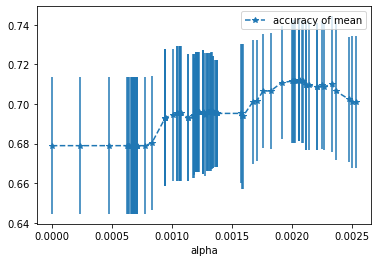

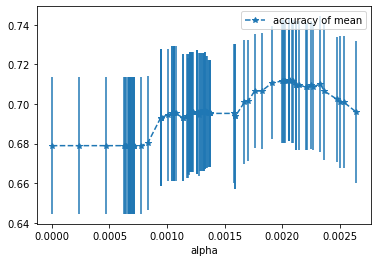

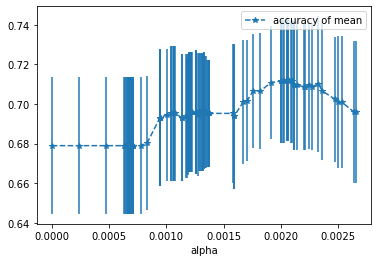

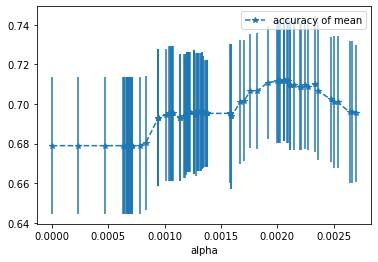

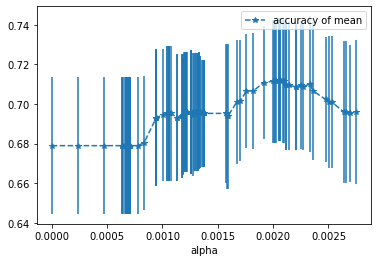

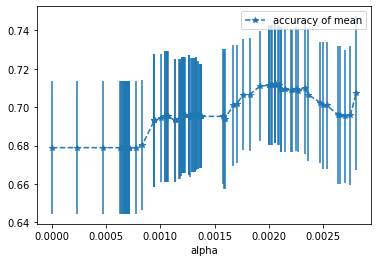

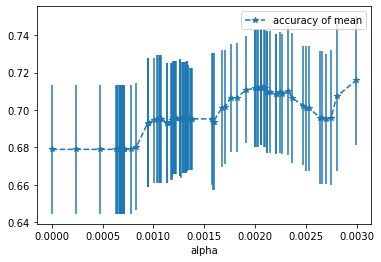

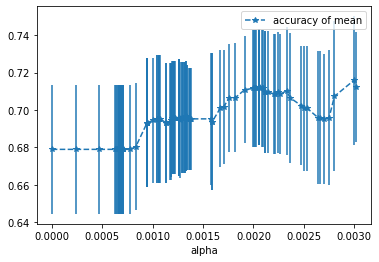

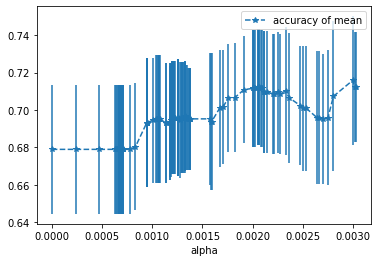

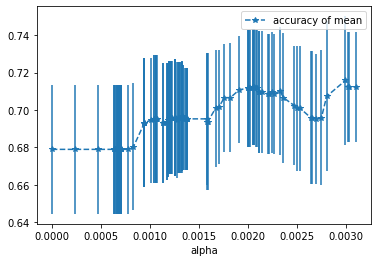

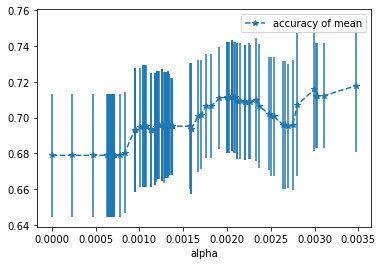

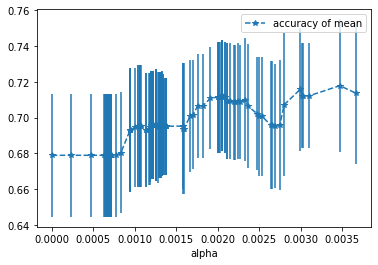

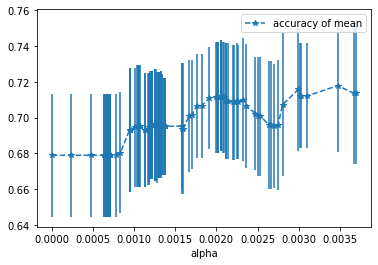

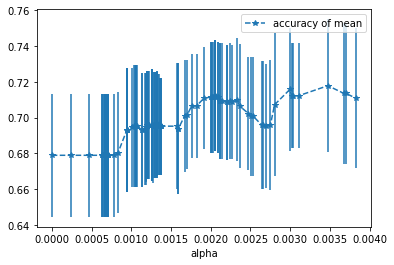

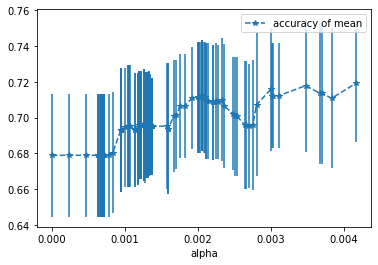

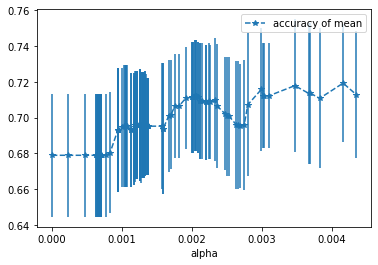

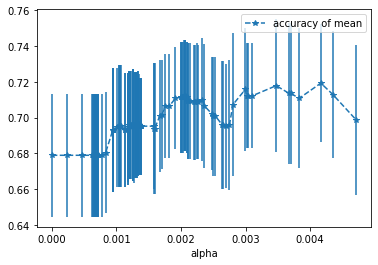

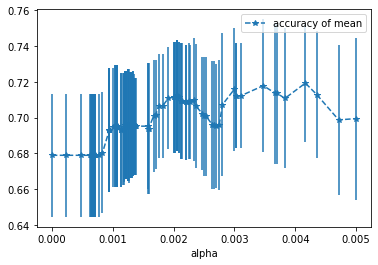

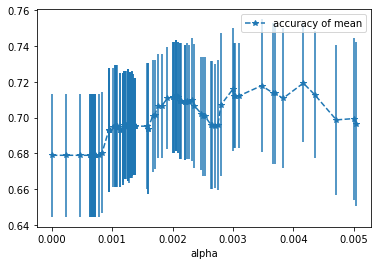

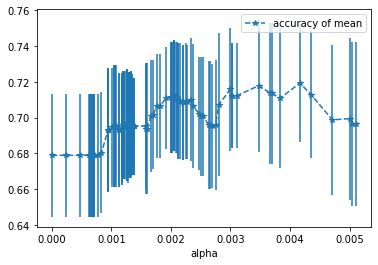

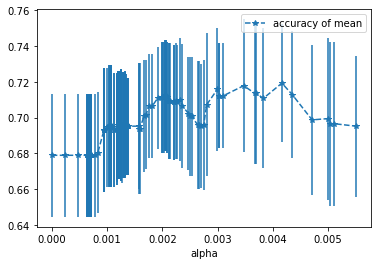

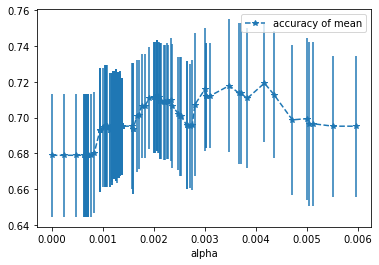

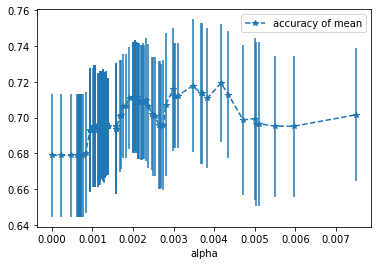

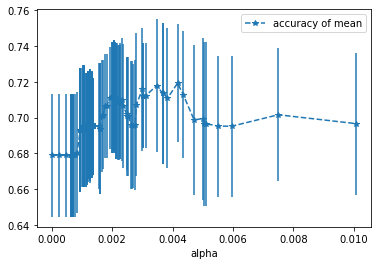

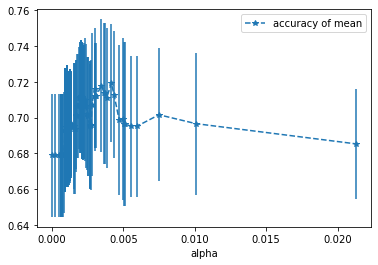

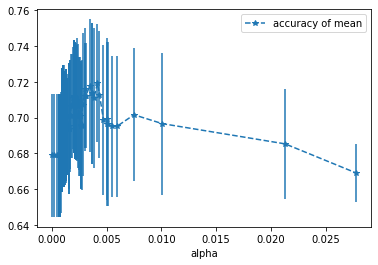

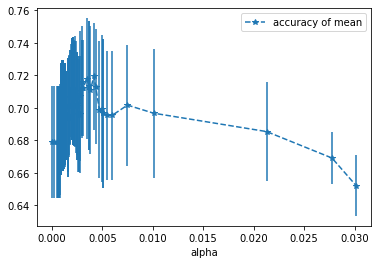

In [20]:
alpha_array = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    accuracy = cross_val_score(clf, X_train, y_train, cv=5)
    alpha_array.append([ccp_alpha, np.mean(accuracy), np.std(accuracy)])
    alpha_results = pd.DataFrame(alpha_array, columns=['alpha', 'accuracy of mean', 'std'])
    alpha_results.plot(x='alpha', y='accuracy of mean', yerr='std', marker='*', linestyle='--')

In [21]:
alpha_results[(alpha_results['alpha'] > 0.007) & (alpha_results['alpha'] <0.009)]

,alpha,accuracy of mean,std
127,0.007498,0.701606,0.03725


In [22]:
alpha_f = alpha_results[(alpha_results['alpha'] > 0.007) & (alpha_results['alpha'] < 0.009)]['alpha']
alpha_f

127    0.007498
Name: alpha, dtype: float64

In [23]:
alpha_f = float(alpha_f)
alpha_f

0.007498120888088308

In [24]:
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha_f)
clf_pruned = clf_pruned.fit(X_train, y_train)

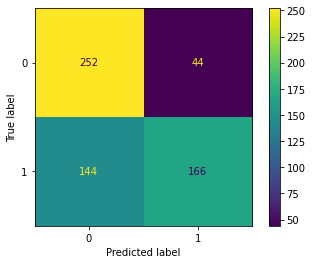

In [25]:
plot_confusion_matrix(clf_pruned, X_test, y_test, display_labels=["0", "1"])

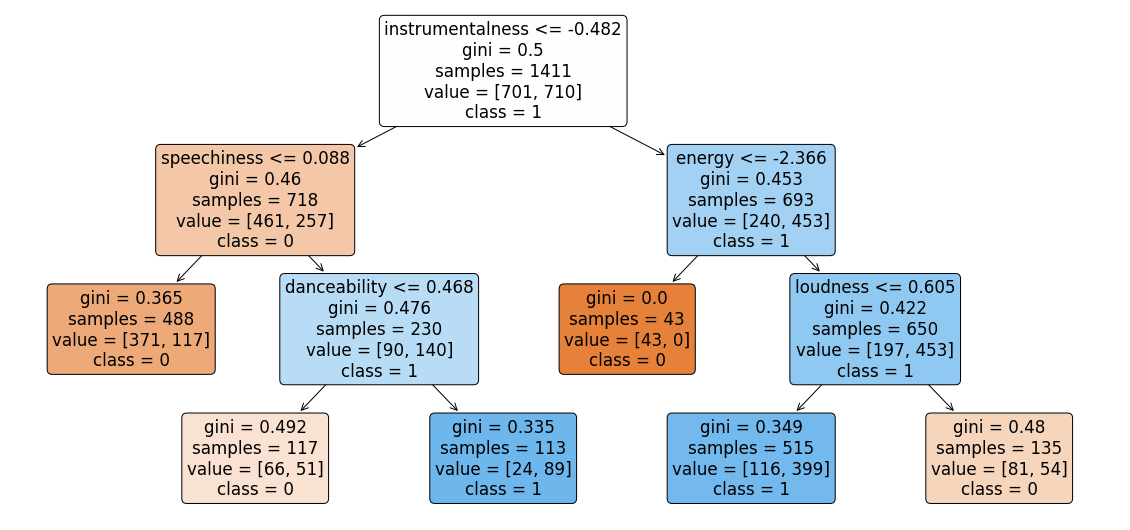

In [26]:
plt.figure(figsize=(20, 9.5))
plot_tree(clf_pruned, filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns);